In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import runner

from unityagents import UnityEnvironment
import numpy as np

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64\\Tennis.exe", no_graphics = True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

In [3]:
arguments = {
    'episodes': 10000,                           # number of episodes
    'brain_name': brain_name,                   # the brain name of the unity environment
    'achievement': 1.,                         # score at which the environment is considered beaten
    'achievement_length': 100,                  # how long the agent needs to get a score above the achievement to solve the environment
    'environment': env, 
    'agent_args': {
        'state_size': 24,
        'action_size': 2,
        'random_seed': 9,
        'fc1_units': 128,
        'fc2_units': 56,
        'update_type': 'soft',
        'tau': 1e-3,
        'gamma': 0.9,
        'buffer_size': int(3e6),
        'batch_size': 1024,
        'batches_per_update': 1,
        'lr_actor': 1e-3,
        'lr_critic': 1e-3,
        'weight_decay': 0
        
        }
    }

NameError: name 'brain_name' is not defined

Episode 100	Average Score: -0.00
Episode 200	Average Score: -0.00
Episode 300	Average Score: -0.00
Episode 400	Average Score: -0.00
Episode 500	Average Score: -0.00
Episode 600	Average Score: -0.00
Episode 700	Average Score: -0.00
Episode 800	Average Score: -0.00
Episode 900	Average Score: -0.00
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.020
Episode 1200	Average Score: 0.05
Episode 1300	Average Score: 0.07
Episode 1400	Average Score: 0.06
Episode 1500	Average Score: 0.38
Episode 1532	Average Score: 1.02

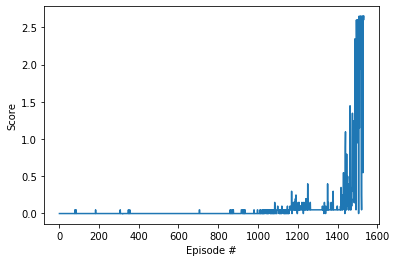

In [6]:
importlib.reload(runner)

scores = runner.ddpg_runner(arguments)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
from ddpg_agent import Agent


env = UnityEnvironment(file_name="Tennis_Windows_x86_64\\Tennis.exe", no_graphics = False)
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


agent = Agent(arguments['agent_args'])

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
reward = 0
while True:
    actions = agent.act(states, add_noise =False)
    env_info = env.step(actions)[brain_name]
    states = env_info.vector_observations
    dones = env_info.local_done
    reward += np.mean(env_info.rewards)
    if np.any(dones):
        break
        
print(reward)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


2.600000038743019


In [ ]:
env.close()